In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/content/spam.csv',encoding = 'latin-1')

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print(dataset.shape)

(5572, 5)


# **Data preprocessing**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dataset = dataset[['v1','v2']]

In [ ]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(dataset.sample(5))

       v1                                                 v2
2389  ham  Boo. How's things? I'm back at home and a litt...
1029  ham                         Its good, we'll find a way
4709  ham  Ya i knw u vl giv..its ok thanks kano..anyway ...
474   ham  Nice line said by a broken heart- Plz don't cu...
365   ham  Well i know Z will take care of me. So no worr...


In [ ]:
dataset.dropna()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# we will rename the columns
dataset.rename(columns = {'v1':'category','v2':'mail'},inplace = True)

<ipython-input-11-742bccdcde35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.rename(columns = {'v1':'category','v2':'mail'},inplace = True)


In [ ]:
dataset.head()

,category,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['category'] = le.fit_transform(dataset['category'])

In [ ]:
dataset.head()

,category,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Duplicated values
dataset.duplicated().sum()

403

In [ ]:
# dropping duplicates
dataset = dataset.drop_duplicates(keep = 'first')

In [ ]:
dataset.head()

,category,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
print(dataset.shape)

(5169, 2)


# **Exploratory data analysis**

In [ ]:
dataset['category'].value_counts()

0    4516
1     653
Name: category, dtype: int64

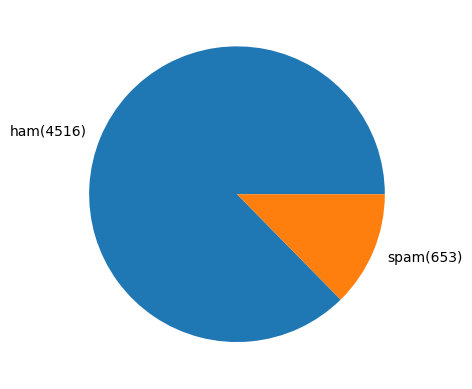

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dataset['category'].value_counts(),labels = ['ham(4516)','spam(653)'])
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset['mail']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: mail, Length: 5169, dtype: object

In [ ]:
dataset['char_count'] = dataset['mail'].apply(len) # we are storing len of each mail in a new mail

In [ ]:
dataset.head()

,category,mail,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
dataset['mail'].apply(lambda x:nltk.word_tokenize(x))  # each word of mail is stored in a list

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: mail, Length: 5169, dtype: object

In [ ]:
dataset['word_count'] = dataset['mail'].apply(lambda x:len(nltk.word_tokenize(x)))  # counts the number of words and store in new column in dataset

In [ ]:
dataset.head()

,category,mail,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
dataset['sentence_count'] = dataset['mail'].apply(lambda x:len(nltk.sent_tokenize(x)))  # simailarly we are storing no of sentences in new column

In [ ]:
dataset.head()

,category,mail,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
new_col = ['char_count','word_count','sentence_count']
dataset[new_col].describe() # this describes about sentence count,word count,letter count

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
dataset[dataset['category']==0][new_col].describe() # describe the same informaation about ham messages

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
dataset[dataset['category']==1][new_col].describe()  # describe the same informaation about spam messages

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='char_count', ylabel='Count'>

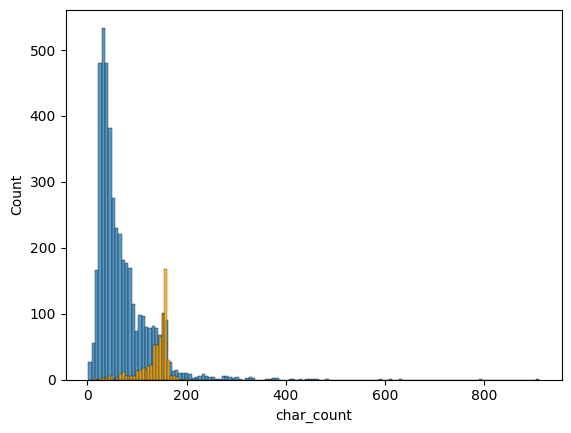

In [ ]:
sns.histplot((dataset[dataset['category'] == 0]['char_count']))
sns.histplot((dataset[dataset['category'] == 1]['char_count']),color = 'orange')

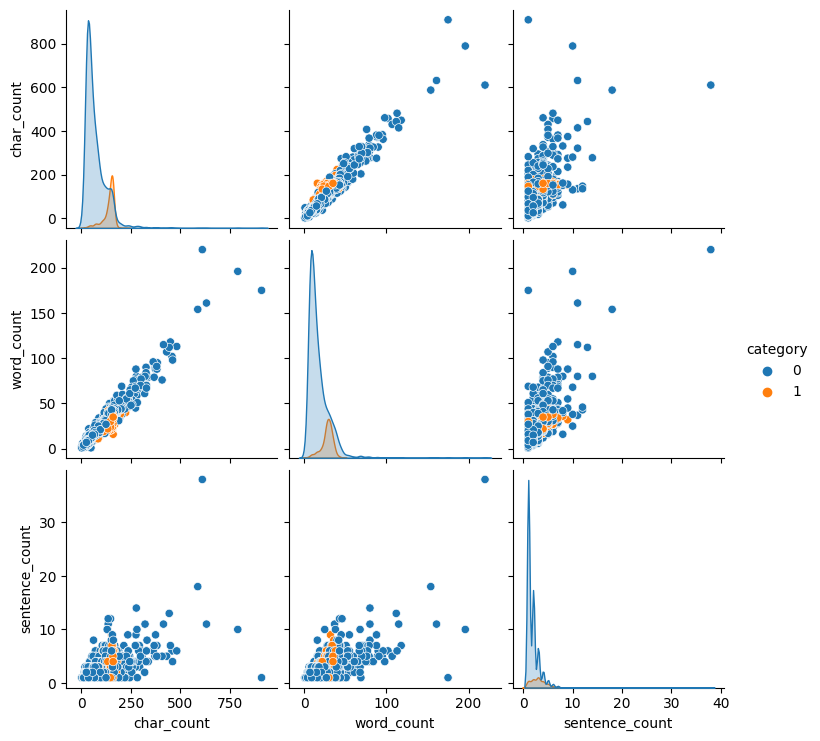

In [ ]:
sns.pairplot(dataset,hue = 'category')

<ipython-input-38-3b4070a6b1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot = True)  # plotting correlation plot to see the relation between differnent columns


<Axes: >

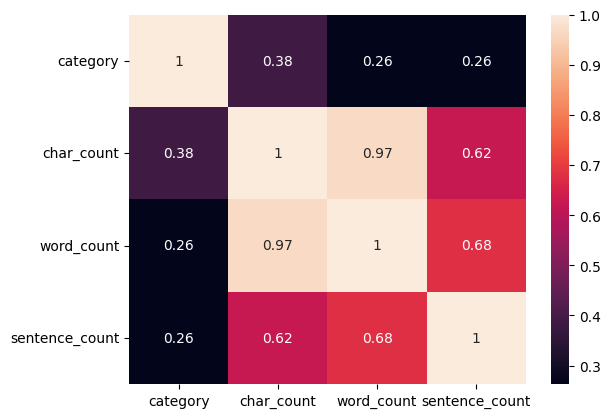

In [ ]:
sns.heatmap(dataset.corr(),annot = True)  # plotting correlation plot to see the relation between differnent columns

# **Text preprocessing**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english') # these are stopwords or in enghlish are verbs and have no useful meaning

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation  # it gives us all punctuation of english

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem import PorterStemmer # it changes a word in its root form
ps = PorterStemmer()
print(ps.stem('Playing'))
print(ps.stem('Played'))
print(ps.stem('Plays'))

play
play
play


In [ ]:
def text_change(content):   # this function removes all the special character of the sentence and gives a list of alpha-numeric words
  content = content.lower()
  content = nltk.word_tokenize(content)

  new_content = []
  for i in content:
    if i.isalnum():
      new_content.append(i)

  content = new_content[:]
  new_content.clear()

  for i in content:
    if i not in stopwords.words('english') and i not in string.punctuation:
      new_content.append(i)

  content = new_content[:]
  new_content.clear()
  for i in content:
    new_content.append(ps.stem(i))

  return " ".join(new_content)

In [ ]:
# the example of this function is:
text_change('I am Dikshit Kumar and i am doing IML Project on Spam email Detection:)')

'dikshit kumar iml project spam email detect'

In [ ]:
dataset['changed_text'] = dataset['mail'].apply(text_change) # we are making new col and storing mail after applying the text_change function

In [ ]:
dataset.head()

,category,mail,char_count,word_count,sentence_count,changed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 50,height= 50,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(dataset[dataset['category'] == 1]['changed_text'].str.cat(sep = " "))

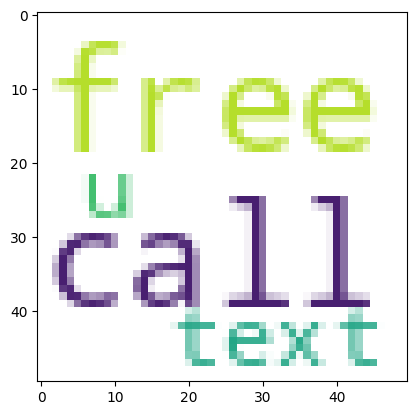

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(dataset[dataset['category'] == 0]['changed_text'].str.cat(sep = " "))

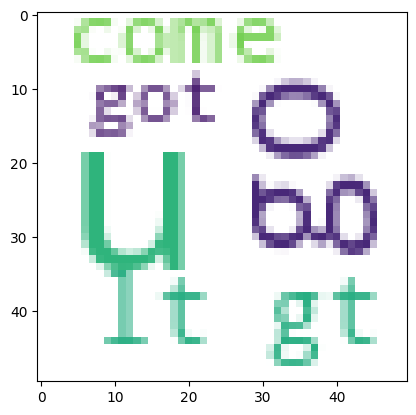

In [ ]:
plt.imshow(ham_wc)

In [ ]:
dataset.head()

,category,mail,char_count,word_count,sentence_count,changed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_words = []    # extracting spam messages keywords in list
for i in dataset[dataset['category']==1]['changed_text'].tolist():
  for w in i.split():
      spam_words.append(w)

In [ ]:
len(spam_words)

9939

In [ ]:
from collections import Counter # printing most common 35 words in spam message
Counter(spam_words).most_common(35)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38)]

In [ ]:
# sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])

# **Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(dataset['changed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(X.shape)

(5169, 6708)


In [ ]:
y = dataset['category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB  # importing all the naive bayes classifier
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [ ]:
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
y_pred_gb

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
print("The accuracy of Gaussian Navie Bayes Classifier is : ", round(accuracy_score(y_test,y_pred_gb)*100,2), "%")

The accuracy of Gaussian Navie Bayes Classifier is :  87.62 %


In [ ]:
print("Confusion matrix of Gaussian Navie Bayes Classifier is: ",confusion_matrix(y_test,y_pred_gb))

Confusion matrix of Gaussian Navie Bayes Classifier is:  [[793 103]
 [ 25 113]]


In [ ]:
print("Precision score of Gaussian Navie Bayes Classifier is: ",precision_score(y_test,y_pred_gb))

Precision score of Gaussian Navie Bayes Classifier is:  0.5231481481481481


In [ ]:
mb.fit(X_train,y_train)  # using Multinomial navie bayes classifier
y_pred_mb = mb.predict(X_test)
print(y_pred_mb)
print("The accuracy of Multinomial Navie Bayes Classifier is : ", round(accuracy_score(y_test,y_pred_mb)*100,2), "%")
print("Confusion matrix of Multinomial Navie Bayes Classifier is: ",confusion_matrix(y_test,y_pred_mb))
print("Precision score of Multinomial Navie Bayes Classifier is: ",precision_score(y_test,y_pred_mb))

[0 0 0 ... 0 0 0]
The accuracy of Multinomial Navie Bayes Classifier is :  95.94 %
Confusion matrix of Multinomial Navie Bayes Classifier is:  [[896   0]
 [ 42  96]]
Precision score of Multinomial Navie Bayes Classifier is:  1.0


In [ ]:
bb.fit(X_train,y_train) # using Bernoulli bayes classifier
y_pred_bb = bb.predict(X_test)
print(y_pred_bb)
print("The accuracy of Bernoulli Navie Bayes Classifier is : ", round(accuracy_score(y_test,y_pred_bb)*100,2), "%")
print("Confusion matrix of Bernoulli Navie Bayes Classifier is: ",confusion_matrix(y_test,y_pred_bb))
print("Precision score of Bernoulli Navie Bayes Classifier is: ",precision_score(y_test,y_pred_bb))

[0 0 0 ... 0 0 0]
The accuracy of Bernoulli Navie Bayes Classifier is :  97.0 %
Confusion matrix of Bernoulli Navie Bayes Classifier is:  [[893   3]
 [ 28 110]]
Precision score of Bernoulli Navie Bayes Classifier is:  0.9734513274336283


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.4 MB/s e

In [ ]:
# using pycaret for finding best model
from pycaret.classification import *

In [ ]:
s = setup(X, target = y)

,Description,Value
0,Session id,5125
1,Target,target
2,Target type,Binary
3,Original data shape,"(5169, 6709)"
4,Transformed data shape,"(5169, 6709)"
5,Transformed train set shape,"(3618, 6709)"
6,Transformed test set shape,"(1551, 6709)"
7,Numeric features,6708
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:36:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9762,0.0000,0.8382,0.9711,0.8983,0.8849,0.8889,1.4810
ridge,Ridge Classifier,0.9693,0.0000,0.7681,0.9864,0.8624,0.8455,0.8546,2.5190
rf,Random Forest Classifier,0.9688,0.9860,0.7573,0.9943,0.8589,0.8418,0.8521,6.1070
ada,Ada Boost Classifier,0.9621,0.9485,0.7681,0.9200,0.8354,0.8143,0.8196,6.3020
gbc,Gradient Boosting Classifier,0.9594,0.9552,0.7113,0.9563,0.8145,0.7923,0.8040,22.5300
lda,Linear Discriminant Analysis,0.9516,0.8295,0.6611,0.9379,0.7734,0.7474,0.7629,51.1960
dt,Decision Tree Classifier,0.9475,0.8773,0.7833,0.7972,0.7894,0.7595,0.7600,3.1320
lr,Logistic Regression,0.9397,0.9822,0.5404,0.9696,0.6913,0.6612,0.6972,2.9430
knn,K Neighbors Classifier,0.8964,0.7278,0.1797,1.0000,0.2992,0.2729,0.3931,2.6570
nb,Naive Bayes,0.8712,0.8552,0.8339,0.4956,0.6209,0.5495,0.5770,1.1480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9762,0.0000,0.8382,0.9711,0.8983,0.8849,0.8889,1.4810
et,Extra Trees Classifier,0.9715,0.9825,0.7857,0.9868,0.8743,0.8585,0.8659,9.4230
ridge,Ridge Classifier,0.9693,0.0000,0.7681,0.9864,0.8624,0.8455,0.8546,2.5190
rf,Random Forest Classifier,0.9688,0.9860,0.7573,0.9943,0.8589,0.8418,0.8521,6.1070
xgboost,Extreme Gradient Boosting,0.9679,0.9609,0.8010,0.9360,0.8622,0.8442,0.8481,11.5570
lightgbm,Light Gradient Boosting Machine,0.9674,0.9686,0.8186,0.9144,0.8629,0.8445,0.8467,3.0900
ada,Ada Boost Classifier,0.9621,0.9485,0.7681,0.9200,0.8354,0.8143,0.8196,6.3020
gbc,Gradient Boosting Classifier,0.9594,0.9552,0.7113,0.9563,0.8145,0.7923,0.8040,22.5300
lda,Linear Discriminant Analysis,0.9516,0.8295,0.6611,0.9379,0.7734,0.7474,0.7629,51.1960
dt,Decision Tree Classifier,0.9475,0.8773,0.7833,0.7972,0.7894,0.7595,0.7600,3.1320
